In [2]:
import numpy as np
import itertools
import time
import matplotlib.pyplot as plt

Pseudocode:
function greedy_genome_selection(matrix):
    genomes, reads = dimensions of matrix
    selected_genomes = list
    uncovered_reads = list of all read indices

    while uncovered_reads is not empty:
        max_covered = -1 # the first genome will always be better

        for genome in genomes:
            covered_reads = empty list
            for read in uncovered_reads:
                if matrix[genome, read] == 1:
                    append read to covered_reads
            if length of covered_reads > max_covered:
                max_covered = length of covered_reads
                max_genome_idx = genome

        append max_genome_idx to selected_genomes

        for read in uncovered_reads:
            if matrix[max_genome_idx, read] == 1:
                remove read from uncovered_reads

    return selected_genomes

In [4]:
def greedy_genome_selection(matrix):
    m, n = matrix.shape
    selected_genomes = []
    uncovered_reads = list(range(n))

    while uncovered_reads:
        max_covered = -1

        for i in range(m):
            covered_reads = []
            # look only at reads which don;t have a genome yet
            for read in uncovered_reads:
                # check all reads not covered by a genome yet for genome i
                if matrix[i, read] == 1:
                    covered_reads.append(read)
            # choose the genome that covers the most uncovered reads
            if len(covered_reads) > max_covered:
                max_covered = len(covered_reads)
                max_genome_idx = i

        selected_genomes.append(max_genome_idx)
        # remove from the uncovered list any reads covered by the genome we are adding
        for read_idx in uncovered_reads[:]:
            if matrix[max_genome_idx, read_idx] == 1:
                uncovered_reads.remove(read_idx)
    # return our list of genomes now that all reads are covered
    return selected_genomes


Pseudocode:
function brute_force_genome_selection(matrix):
    genomes, reads = dimensions of matrix
    smallest_subset = None

    for all subsets of genomes:
        covered_reads = list of size reads 
        for genome in subset:
            genome_reads = list of reads covered by genome
            for read in genome_reads:
                set covered_reads[read] to 1

            if sum(covered_reads) == reads:
                if smallest_subset is None or length of subset < length of smallest_subset:
                    set smallest_subset to subset

    return smallest_subset

In [5]:
def brute_force_genome_selection(matrix):
    m,n = matrix.shape
    genomes = list(range(m))
    smallest_subset = None
    # for all possible subset sizes
    for subset_size in range(1, m + 1):
        # for all possible subsets of that size
        for subset in itertools.combinations(genomes, subset_size):
            # track with 0 if read n is covered or not. 1 means covered
            covered_reads = [0] * n
            # for each genome in the subset
            for genome_idx in subset:
                # loop through the reads and mark them as covered if they are
                genome_reads = np.nonzero(matrix[genome_idx])[0]
                for read_idx in genome_reads:
                    covered_reads[read_idx] = 1
            # the sum of covered_reads is how many reads we covered with the subset
            # we only consider subsets that covered all the reads (n)
            if sum(covered_reads) == n:
                # for the first subset, and all subsets that are shorter than the previously ideal subset, keep only smallest subset covering all reads
                if smallest_subset is None or len(subset) < len(smallest_subset):
                    smallest_subset = subset
    # return best soln after checking all possible solns
    return smallest_subset

In [6]:
def test_iterations(m,n,k):
    greedy_times = np.zeros(0)
    greedy_sizes = np.zeros(0)
    brute_force_times = np.zeros(0)
    brute_force_sizes = np.zeros(0)
    for i in range(k):
        # Generate a random matrix of genomes by reads
        matrix = np.random.randint(0, 2, size=(m, n))
        # if a matrix column is all zeros, regenerate the matrix
        while np.any(np.all(matrix == 0, axis=0)):
            matrix = np.random.randint(0, 2, size=(m, n))

        # run both programs and time them separately
        start_time = time.time()
        selected_genomes = greedy_genome_selection(matrix)
        end_time = time.time()
        greedy_execution_time = end_time - start_time
        greedy_soln_size = len(selected_genomes)

        start_time = time.time()
        selected_genomes = brute_force_genome_selection(matrix)
        end_time = time.time()
        brute_force_execution_time = end_time - start_time
        brute_force_soln_size = len(selected_genomes)
        # append the soln size and the time to a running list for each method
        greedy_times=np.append(greedy_times,greedy_execution_time)
        greedy_sizes=np.append(greedy_sizes,greedy_soln_size)
        brute_force_times=np.append(brute_force_times,brute_force_execution_time)
        brute_force_sizes=np.append(brute_force_sizes,brute_force_soln_size)

    # take the average soln size and time for each method and return it
    greedy_avg_time = np.mean(greedy_times)
    greedy_avg_soln_size = np.mean(greedy_sizes)
    brute_avg_time = np.mean(brute_force_times)
    brute_avg_soln_size = np.mean(brute_force_sizes)
    return greedy_avg_time, greedy_avg_soln_size, brute_avg_time, brute_avg_soln_size
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


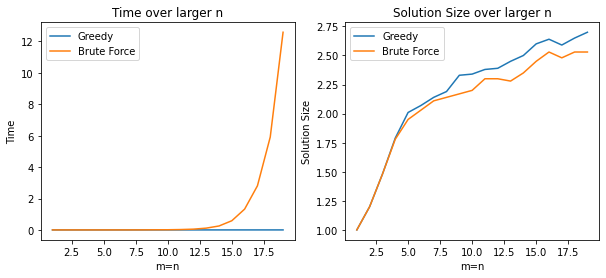

In [7]:
# run each method for k=100 and m=n=1 and so on until it becomes impractical. Plot the results for each n
greedy_times = []
greedy_sizes=[]
brute_times=[]
brute_sizes=[]
for i in range(1,20):
    print(i)
    greedy_avg_time, greedy_avg_soln_size, brute_avg_time, brute_avg_soln_size = test_iterations(i,i,100)
    greedy_times.append(greedy_avg_time)
    greedy_sizes.append(greedy_avg_soln_size)
    brute_times.append(brute_avg_time)
    brute_sizes.append(brute_avg_soln_size)


# Plotting
x_values = list(range(1, len(greedy_times) + 1))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_values,greedy_times, label='Greedy')
plt.plot(x_values,brute_times, label='Brute Force')
plt.xlabel('m=n')
plt.ylabel('Time')
plt.title('Time over larger n')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values,greedy_sizes, label='Greedy')
plt.plot(x_values,brute_sizes, label='Brute Force')
plt.xlabel('m=n')
plt.ylabel('Solution Size')
plt.title('Solution Size over larger n')
plt.legend()

# Display the plot
plt.show()